<h1 align="center">MNIST Data Exploration & Visualization</h1>

# 1. Introduction

In this notebook, we'll explore the MNIST dataset of handwritten digits. We'll visualize the data, examine its characteristics, and prepare it for training a Convolutional Neural Network (CNN).

# 2. Setup

## 2.1. Import Libraries

In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import pandas as pd

2025-04-22 23:41:40.628181: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 23:41:40.702459: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 23:41:40.704687: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-22 23:41:42.532431: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 2.2. Set Display Options

In [2]:
# Configure visualization settings
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

/tmp/ipykernel_2703/1669165961.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# 3. Dataset Loading

## 3.1. Load MNIST Data

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


## 3.2. Initial Data Inspection

In [4]:
# Display dataset information
print("Dataset Information:")
print(f"Total training images: {len(x_train)}")
print(f"Total test images: {len(x_test)}")
print(f"Image dimensions: {x_train[0].shape}")
print(f"Data type: {x_train.dtype}")
print(f"Min pixel value: {x_train.min()}")
print(f"Max pixel value: {x_train.max()}")

Dataset Information:
Total training images: 60000
Total test images: 10000
Image dimensions: (28, 28)
Data type: uint8
Min pixel value: 0
Max pixel value: 255


# 4. Basic Data Visualization

## 4.1. Display Sample Images

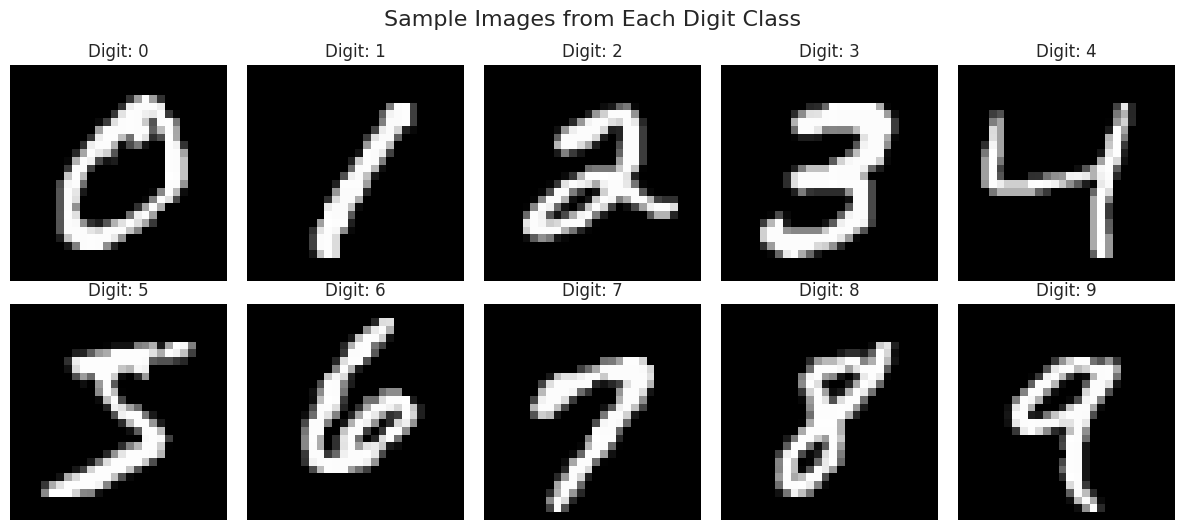

In [5]:
# Display a grid of sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
    # Find the first image of digit i
    idx = np.where(y_train == i)[0][0]
    
    # Display the image
    axes[i].imshow(x_train[idx], cmap='gray')
    axes[i].set_title(f"Digit: {i}")
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Sample Images from Each Digit Class", y=1.05, fontsize=16)
plt.show()

## 4.2. Pixel Intensity Distribution

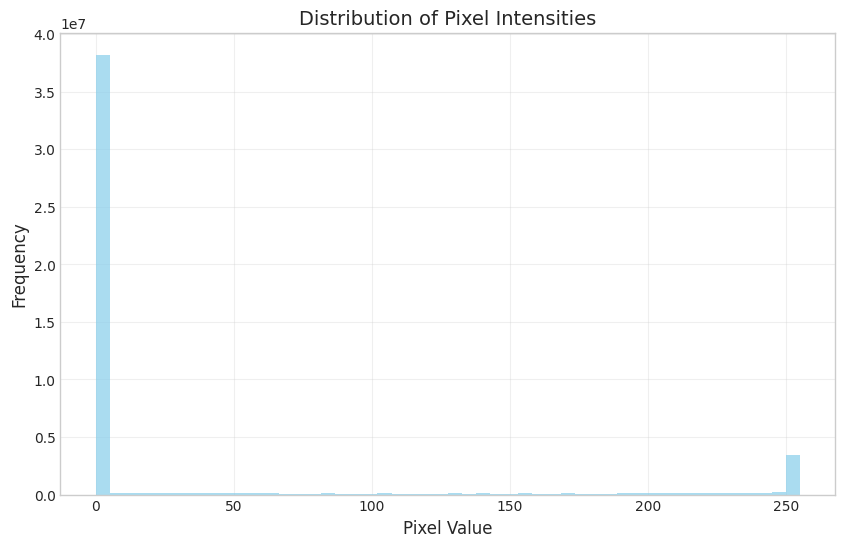

Mean pixel value: 33.32
Median pixel value: 0.0
Standard deviation: 78.57


In [6]:
# Plot the distribution of pixel intensities
pixel_values = x_train.reshape(-1)  # Flatten all images

plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=50, color='skyblue', alpha=0.7)
plt.title("Distribution of Pixel Intensities", fontsize=14)
plt.xlabel("Pixel Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Print statistics about pixel values
print(f"Mean pixel value: {np.mean(pixel_values):.2f}")
print(f"Median pixel value: {np.median(pixel_values)}")
print(f"Standard deviation: {np.std(pixel_values):.2f}")

# 5. Class Distribution Analysis

## 5.1. Class Distribution

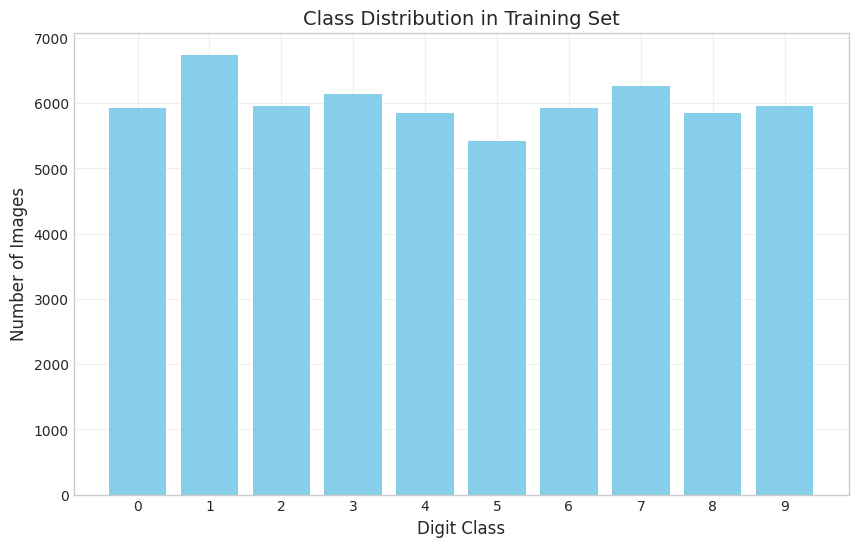

Digit 0: 5923 images (9.87%)
Digit 1: 6742 images (11.24%)
Digit 2: 5958 images (9.93%)
Digit 3: 6131 images (10.22%)
Digit 4: 5842 images (9.74%)
Digit 5: 5421 images (9.04%)
Digit 6: 5918 images (9.86%)
Digit 7: 6265 images (10.44%)
Digit 8: 5851 images (9.75%)
Digit 9: 5949 images (9.92%)


In [7]:
# Analyze class distribution
unique_labels, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts, color='skyblue')
plt.title("Class Distribution in Training Set", fontsize=14)
plt.xlabel("Digit Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(unique_labels)
plt.grid(True, alpha=0.3)
plt.show()

# Print class statistics
for digit, count in zip(unique_labels, counts):
    print(f"Digit {digit}: {count} images ({count/len(y_train)*100:.2f}%)")

## 5.2. Class Balance Visualization

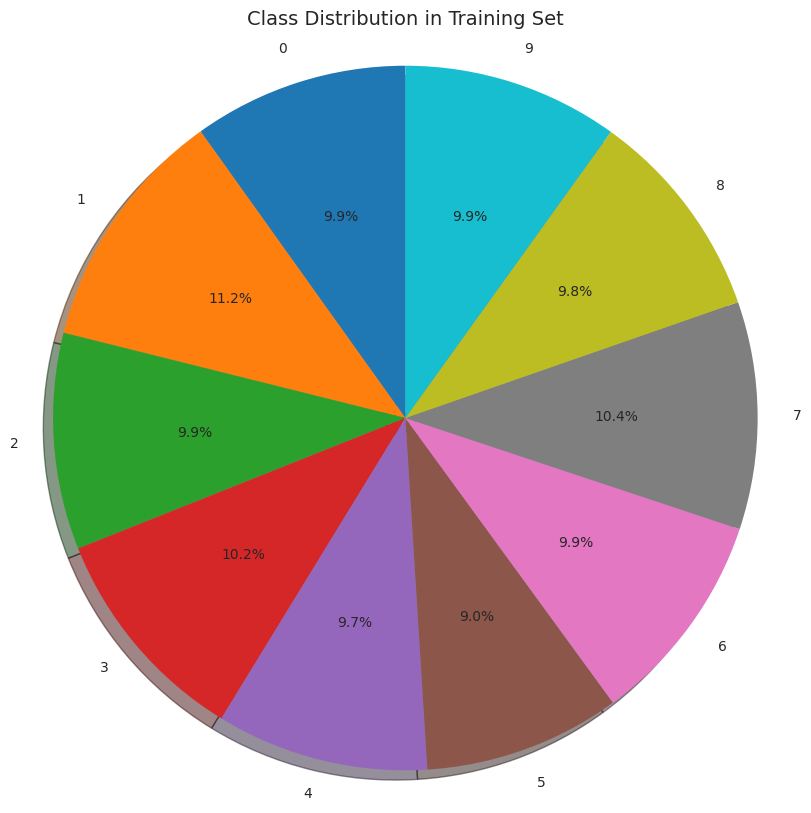

In [8]:
# Visualize class balance as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=unique_labels, autopct='%1.1f%%', 
        shadow=True, startangle=90, colors=plt.cm.tab10.colors)
plt.axis('equal')
plt.title("Class Distribution in Training Set", fontsize=14)
plt.show()

# 6. Image Characteristics

## 6.1. Average Digit Images

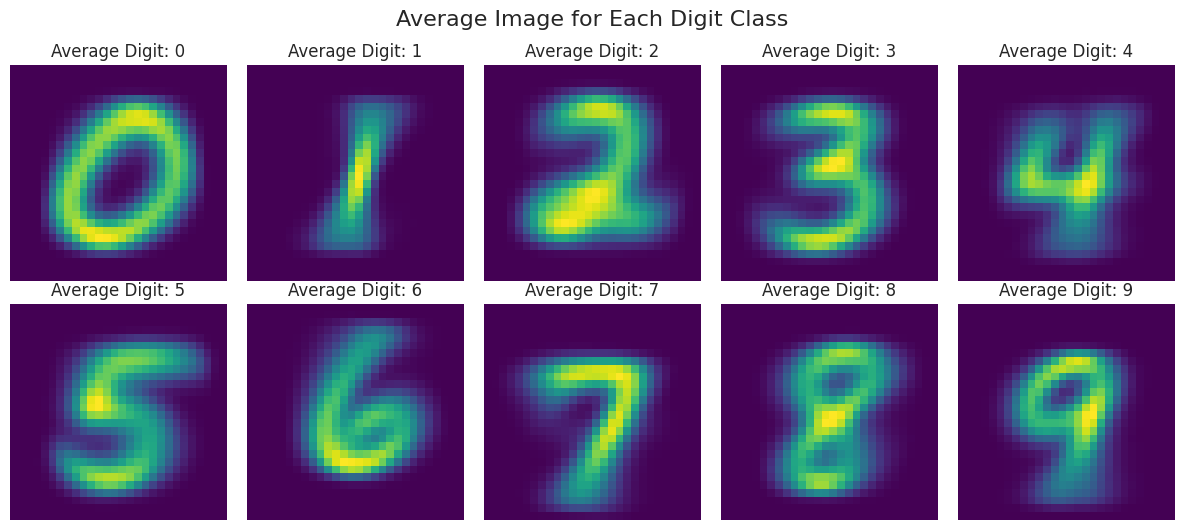

In [9]:
# Calculate and display the average image for each digit class
avg_digits = np.zeros((10, 28, 28))

for i in range(10):
    # Find all images of digit i
    indices = np.where(y_train == i)[0]
    avg_digits[i] = np.mean(x_train[indices], axis=0)

# Display average images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(avg_digits[i], cmap='viridis')
    axes[i].set_title(f"Average Digit: {i}")
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Average Image for Each Digit Class", y=1.05, fontsize=16)
plt.show()

## 6.2. Digit Variability

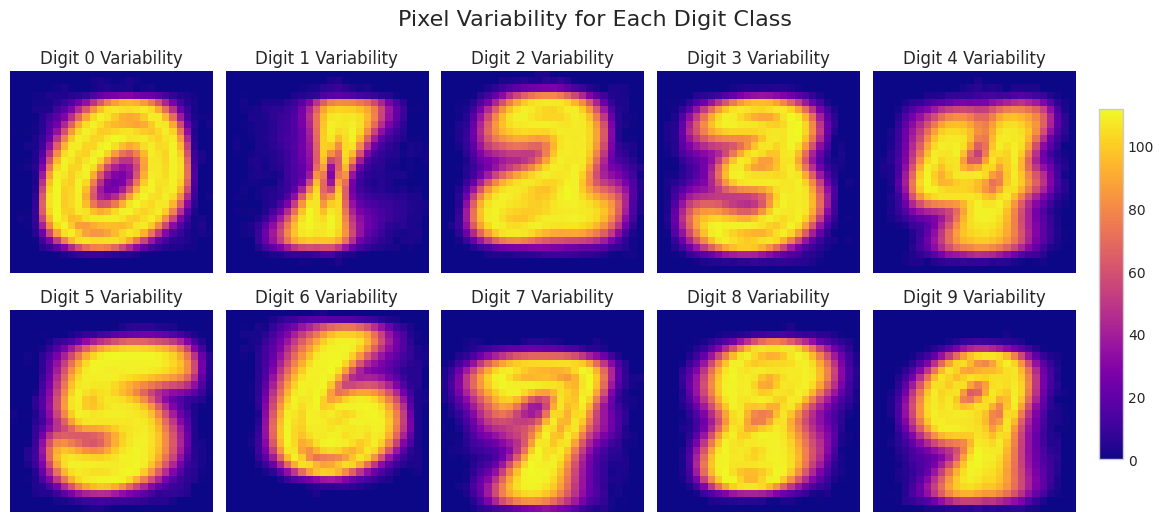

In [10]:
# Calculate standard deviation of pixel values for each digit class
std_digits = np.zeros((10, 28, 28))

for i in range(10):
    indices = np.where(y_train == i)[0]
    std_digits[i] = np.std(x_train[indices], axis=0)

# Display standard deviation images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
    im = axes[i].imshow(std_digits[i], cmap='plasma')
    axes[i].set_title(f"Digit {i} Variability")
    axes[i].axis('off')

plt.tight_layout()
plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.suptitle("Pixel Variability for Each Digit Class", y=1.05, fontsize=16)
plt.show()

# 7. Exploring Digit Variations

## 7.1. Multiple Examples Per Digit

## 7.2. Digit Morphology

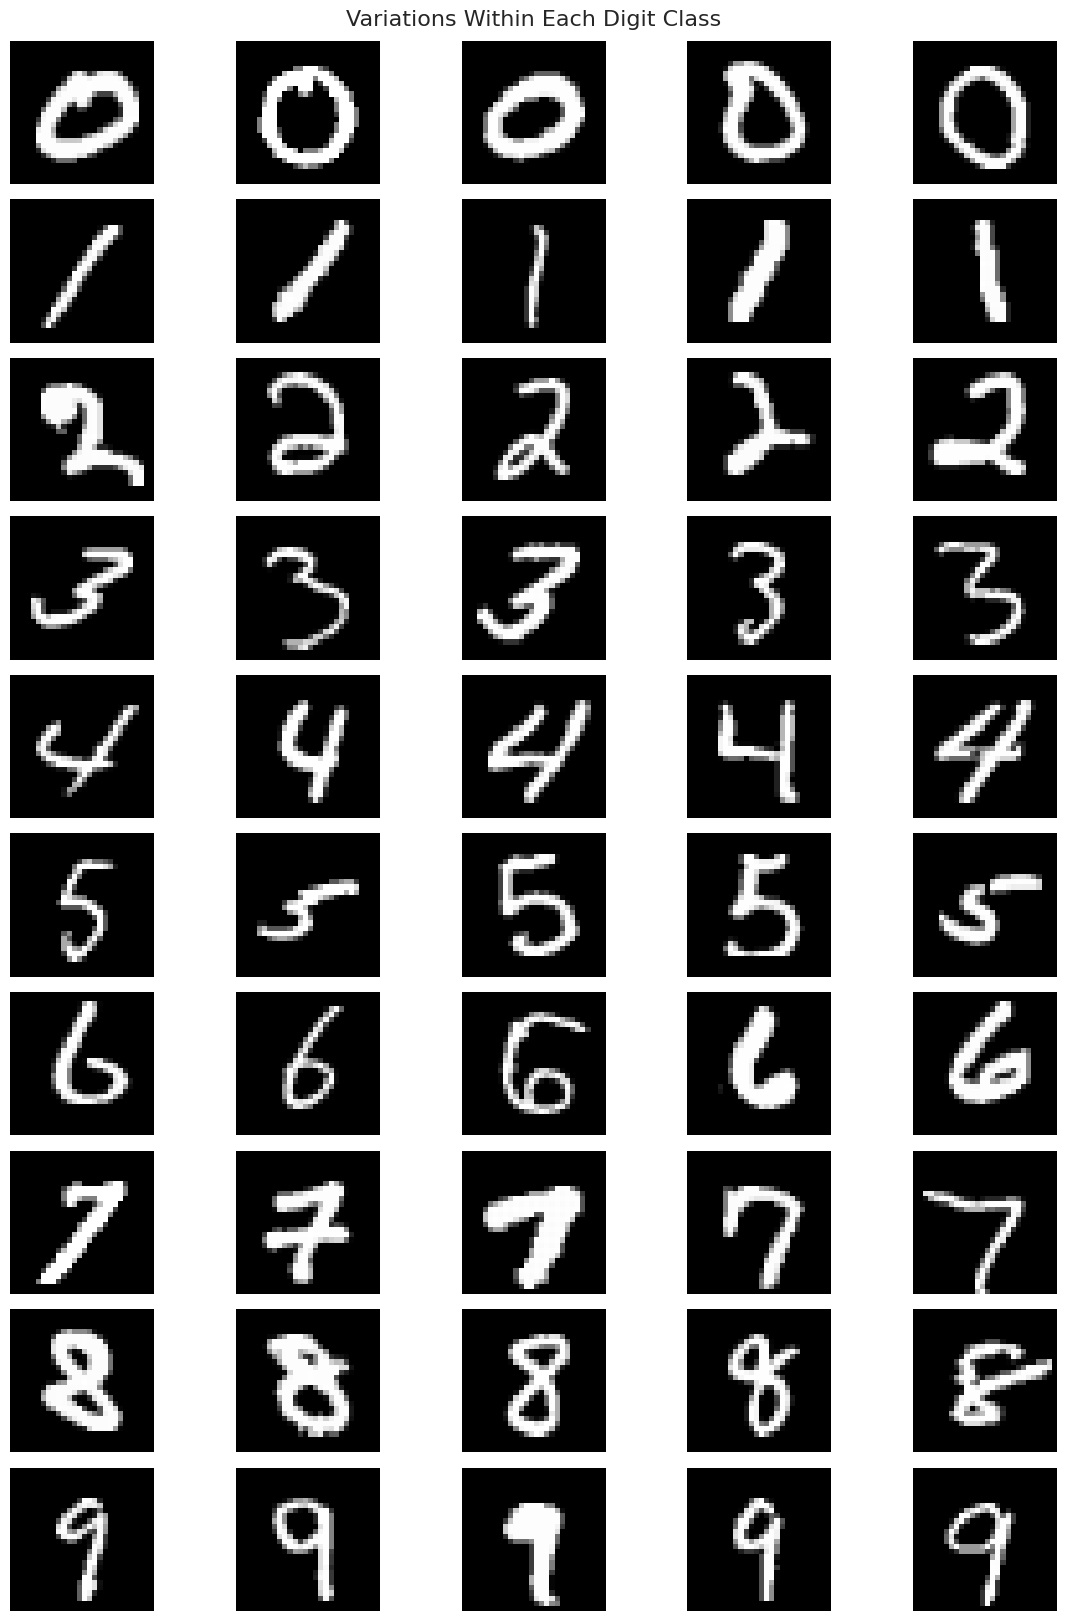

In [11]:
# Display multiple examples for each digit
samples_per_digit = 5
fig, axes = plt.subplots(10, samples_per_digit, figsize=(12, 16))

for digit in range(10):
    # Find indices of this digit
    indices = np.where(y_train == digit)[0]
    # Randomly select samples_per_digit examples
    selected_indices = np.random.choice(indices, samples_per_digit, replace=False)
    
    for i, idx in enumerate(selected_indices):
        axes[digit, i].imshow(x_train[idx], cmap='gray')
        axes[digit, i].axis('off')
    
    # Add label for the digit on the left
    axes[digit, 0].set_ylabel(f"Digit {digit}", rotation=0, labelpad=40, 
                              fontsize=14, ha='right', va='center')

plt.tight_layout()
plt.suptitle("Variations Within Each Digit Class", y=1.01, fontsize=16)
plt.show()

ModuleNotFoundError: No module named 'skimage'

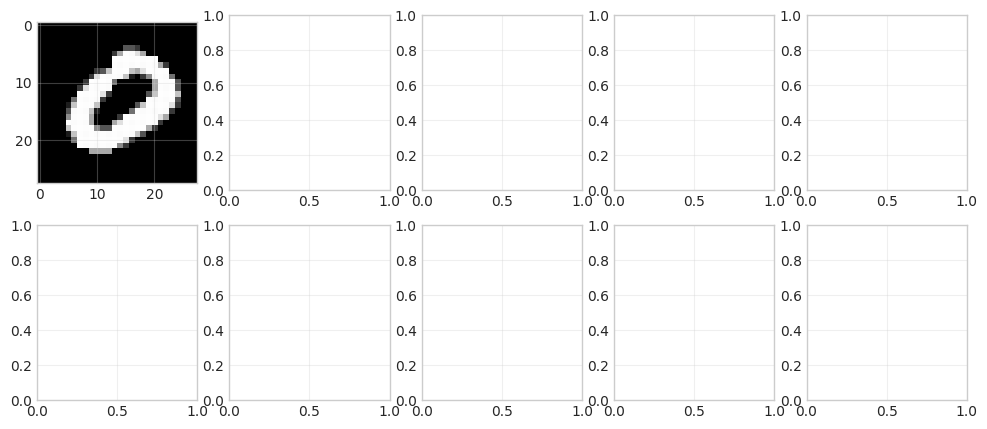

In [12]:
# Calculate and display average contours for each digit
def get_contour(img, threshold=50):
    """Extract contour from digit image."""
    binary = (img > threshold).astype(np.uint8)
    from skimage import measure
    contours = measure.find_contours(binary, 0.5)
    return contours[0] if contours else None

# Display a random digit with its contour
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
    # Select a random image of digit i
    idx = np.random.choice(np.where(y_train == i)[0])
    img = x_train[idx]
    
    # Plot the image
    axes[i].imshow(img, cmap='gray')
    
    # Extract and plot contour
    contour = get_contour(img)
    if contour is not None:
        axes[i].plot(contour[:, 1], contour[:, 0], 'r', linewidth=2)
    
    axes[i].set_title(f"Digit {i} with Contour")
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Digit Contours", y=1.05, fontsize=16)
plt.show()

# 8. Feature Analysis

## 8.1. Dimensionality Reduction

In [ ]:
# Use t-SNE to visualize the high-dimensional data in 2D
from sklearn.manifold import TSNE

# Sample a subset of images for t-SNE (it's computationally intensive)
n_samples = 2000
random_indices = np.random.choice(len(x_train), n_samples, replace=False)
sampled_images = x_train[random_indices].reshape(n_samples, -1)
sampled_labels = y_train[random_indices]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(sampled_images)

# Plot the results
plt.figure(figsize=(12, 10))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                     c=sampled_labels, cmap='tab10', alpha=0.6, s=30)
plt.colorbar(scatter, label='Digit Class')
plt.title('t-SNE Visualization of MNIST Digits', fontsize=14)
plt.xlabel('t-SNE Feature 1', fontsize=12)
plt.ylabel('t-SNE Feature 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 8.2. Principal Component Analysis

In [ ]:
# Apply PCA to visualize the data
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train.reshape(len(x_train), -1))

# Create a dataframe for easier plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['digit'] = y_train

# Plot the results
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='digit', data=pca_df, 
                palette='tab10', alpha=0.6, s=30)
plt.title('PCA Visualization of MNIST Digits', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Digit')
plt.show()

# Print variance explained by the first two principal components
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_[:2]):.4f}")

# 9. Data Preprocessing

## 9.1. Pixel Value Normalization

In [ ]:
# Normalize pixel values to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Plot original vs normalized image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original image
idx = np.random.randint(0, len(x_train))
axes[0].imshow(x_train[idx], cmap='gray')
axes[0].set_title("Original Image\nPixel Values: [0-255]")
axes[0].axis('off')

# Normalized image
axes[1].imshow(x_train_normalized[idx], cmap='gray')
axes[1].set_title("Normalized Image\nPixel Values: [0-1]")
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Original image pixel range: [{x_train.min()}, {x_train.max()}]")
print(f"Normalized image pixel range: [{x_train_normalized.min()}, {x_train_normalized.max()}]")

## 9.2. Reshaping for CNN

In [ ]:
# Reshape data to include channel dimension for CNN
x_train_cnn = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_normalized.reshape(-1, 28, 28, 1)

print(f"Original shape: {x_train_normalized.shape}")
print(f"Reshaped for CNN: {x_train_cnn.shape}")

# Visualize transformation (it looks the same but has different shape)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(x_train_cnn[0, :, :, 0], cmap='gray')
ax.set_title(f"Sample Image\nShape: {x_train_cnn[0].shape}")
ax.axis('off')
plt.show()

## 9.3. One-Hot Encoding Labels

In [ ]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# Display the original vs one-hot encoded labels
idx = 42  # Sample index
print(f"Original label: {y_train[idx]}")
print(f"One-hot encoded label: {y_train_categorical[idx]}")
print(f"Decoded from one-hot: {np.argmax(y_train_categorical[idx])}")

# 10. Data Splitting

## 10.1. Create Training and Validation Sets

In [ ]:
# Split training data into training and validation sets
val_split = 0.1
random_seed = 42

# Create random indices for splitting
np.random.seed(random_seed)
indices = np.random.permutation(len(x_train_cnn))
val_size = int(len(x_train_cnn) * val_split)
train_indices = indices[val_size:]
val_indices = indices[:val_size]

# Create validation set
x_val = x_train_cnn[val_indices]
y_val = y_train_categorical[val_indices]

# Update training set
x_train_final = x_train_cnn[train_indices]
y_train_final = y_train_categorical[train_indices]

print(f"Training set: {x_train_final.shape[0]} samples")
print(f"Validation set: {x_val.shape[0]} samples")
print(f"Test set: {x_test_cnn.shape[0]} samples")

## 10.2. Verify Class Distribution After Splitting

In [ ]:
# Ensure class balance is preserved in splits
train_dist = np.sum(y_train_final, axis=0)
val_dist = np.sum(y_val, axis=0)
test_dist = np.sum(y_test_categorical, axis=0)

# Convert to percentages
train_pct = train_dist / np.sum(train_dist) * 100
val_pct = val_dist / np.sum(val_dist) * 100
test_pct = test_dist / np.sum(test_dist) * 100

# Create dataframe for comparison
dist_df = pd.DataFrame({
    'Training Set (%)': train_pct,
    'Validation Set (%)': val_pct,
    'Test Set (%)': test_pct
}, index=[f'Digit {i}' for i in range(10)])

print("Class distribution across datasets:")
print(dist_df)

# Visualize distribution comparison
dist_df.plot(kind='bar', figsize=(14, 7))
plt.title('Class Distribution Comparison Across Datasets', fontsize=14)
plt.xlabel('Digit Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# 11. Sample Batch Visualization

## 11.1. Create and Visualize a Batch

In [ ]:
# Create a small batch of data
batch_size = 64
batch_indices = np.random.choice(len(x_train_final), batch_size, replace=False)
x_batch = x_train_final[batch_indices]
y_batch = y_train_final[batch_indices]

# Visualize the batch
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
axes = axes.flatten()

for i in range(batch_size):
    axes[i].imshow(x_batch[i, :, :, 0], cmap='gray')
    digit = np.argmax(y_batch[i])
    axes[i].set_title(f"{digit}")
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Sample Training Batch", y=1.02, fontsize=16)
plt.show()

# 12. Data Augmentation Preview

## 12.1. Visualize Image Augmentations

In [ ]:
# Preview data augmentation techniques
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

# Select a single image for demonstration
img = x_train_final[0]
img = img.reshape((1,) + img.shape)  # reshape for generator

# Generate augmented images
augmented_images = [img[0]]  # Start with original
for i, batch in enumerate(datagen.flow(img, batch_size=1)):
    augmented_images.append(batch[0])
    if i >= 8:  # Generate 8 augmented images
        break

# Visualize original and augmented images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, img in enumerate(augmented_images):
    axes[i].imshow(img[:, :, 0], cmap='gray')
    if i == 0:
        axes[i].set_title("Original")
    else:
        axes[i].set_title(f"Augmented #{i}")
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Data Augmentation Examples", y=1.02, fontsize=16)
plt.show()

# 13. Summary and Conclusions

## 13.1. Dataset Characteristics

In [ ]:
# Create a summary table of dataset characteristics
summary_data = {
    'Description': [
        'Dataset Name', 
        'Number of Training Examples',
        'Number of Test Examples',
        'Image Dimensions',
        'Number of Classes',
        'Class Distribution',
        'Pixel Value Range (Original)',
        'Pixel Value Range (Normalized)'
    ],
    'Value': [
        'MNIST Handwritten Digits',
        f'{len(x_train):,}',
        f'{len(x_test):,}',
        '28x28 grayscale (28x28x1 for CNN)',
        '10 (digits 0-9)',
        'Approximately balanced',
        f'[{x_train.min()}, {x_train.max()}]',
        '[0.0, 1.0]'
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df

## 13.2. Preprocessing Summary

In [ ]:
# Create a summary of preprocessing steps
preprocess_steps = {
    'Step': [
        'Normalization', 
        'Reshaping',
        'Label Encoding',
        'Data Splitting'
    ],
    'Description': [
        'Scale pixel values from [0-255] to [0-1]',
        'Add channel dimension: (samples, 28, 28) → (samples, 28, 28, 1)',
        'Convert class labels to one-hot encoded vectors',
        'Split training data into training (90%) and validation (10%) sets'
    ],
    'Purpose': [
        'Improves training stability and convergence',
        'Required format for CNN input layers',
        'Required format for categorical cross-entropy loss',
        'Allows monitoring of model performance during training'
    ]
}

preprocess_df = pd.DataFrame(preprocess_steps)
preprocess_df

# 14. Next Steps

## 14.1. Preparation for Model Building

In [ ]:
# Save preprocessed data for model training
if not os.path.exists('data/mnist'):
    os.makedirs('data/mnist')

np.save('data/mnist/x_train.npy', x_train_final)
np.save('data/mnist/y_train.npy', y_train_final)
np.save('data/mnist/x_val.npy', x_val)
np.save('data/mnist/y_val.npy', y_val)
np.save('data/mnist/x_test.npy', x_test_cnn)
np.save('data/mnist/y_test.npy', y_test_categorical)

print("Preprocessed data saved to data/mnist/")
print("Ready for model building!")

## 14.2. Dataset Overview Visualization

In [ ]:
# Create a final visualization of the dataset
fig = plt.figure(figsize=(12, 8))

# Visualization 1: Sample digits
ax1 = plt.subplot2grid((2, 3), (0, 0))
sample_idx = np.random.randint(0, len(x_train))
ax1.imshow(x_train[sample_idx], cmap='gray')
ax1.set_title(f"Sample Digit: {y_train[sample_idx]}")
ax1.axis('off')

# Visualization 2: Average digits
ax2 = plt.subplot2grid((2, 3), (0, 1), colspan=2)
ax2.imshow(np.hstack([avg_digits[i] for i in range(10)]), cmap='viridis')
ax2.set_title("Average Digit Images (0-9)")
ax2.axis('off')

# Visualization 3: Class distribution
ax3 = plt.subplot2grid((2, 3), (1, 0), colspan=2)
ax3.bar(range(10), counts, color='skyblue')
ax3.set_title("Class Distribution")
ax3.set_xlabel("Digit Class")
ax3.set_ylabel("Count")
ax3.set_xticks(range(10))

# Visualization 4: Pixel intensity distribution
ax4 = plt.subplot2grid((2, 3), (1, 2))
ax4.hist(pixel_values, bins=20, color='skyblue')
ax4.set_title("Pixel Distribution")
ax4.set_xlabel("Pixel Value")
ax4.set_ylabel("Frequency")

plt.tight_layout()
plt.suptitle("MNIST Dataset Overview", y=1.02, fontsize=16)
plt.show()